In [1]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
%matplotlib inline

### Below is the description of all the features in the data:

##### Age: This feature represents the age of the individual.
##### Gender: This feature captures the gender of the individual.
##### Marital Status: This feature denotes the marital status of the individual.
##### Education Level: This feature represents the highest level of education attained by the individual.
##### Employment Status: This feature indicates the current employment status of the individual.
##### Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.
##### Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.
##### Number of Credit Accounts: It represents the count of active credit accounts the person holds.
##### Loan Amount: It indicates the monetary value of the loan.
##### Interest Rate: This feature represents the interest rate associated with the loan.
##### Loan Term: This feature denotes the duration or term of the loan.
##### Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

In [2]:
df = pd.read_csv('credit_scoring.csv')

In [3]:
df.head(5)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,4.270200e+01,1.326677e+01,20.00,3.100000e+01,42.000,54.00,65.00
Credit Utilization Ratio,1000.0,5.099500e-01,2.910567e-01,0.00,2.500000e-01,0.530,0.75,1.00
Payment History,1000.0,1.452814e+03,8.279341e+02,0.00,7.637500e+02,1428.000,2142.00,2857.00
Number of Credit Accounts,1000.0,5.580000e+00,2.933634e+00,1.00,3.000000e+00,6.000,8.00,10.00
Loan Amount,1000.0,2.471401e+06,1.387047e+06,108000.00,1.298000e+06,2437500.000,3653250.00,4996000.00
Interest Rate,1000.0,1.068660e+01,5.479058e+00,1.01,6.022500e+00,10.705,15.44,19.99
Loan Term,1000.0,3.712800e+01,1.743627e+01,12.00,2.400000e+01,36.000,48.00,60.00


In [6]:
df['Type of Loan'].value_counts()

Type of Loan
Auto Loan        348
Home Loan        328
Personal Loan    324
Name: count, dtype: int64

<Axes: >

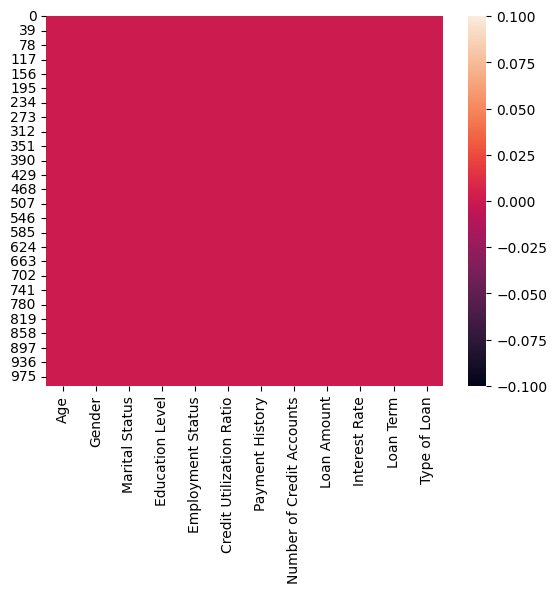

In [7]:
sns.heatmap(df.isnull())

C:\Users\mujee\AppData\Local\Temp\ipykernel_13348\3288062535.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Credit Utilization Ratio', data=df, palette='rainbow')


<Axes: ylabel='Credit Utilization Ratio'>

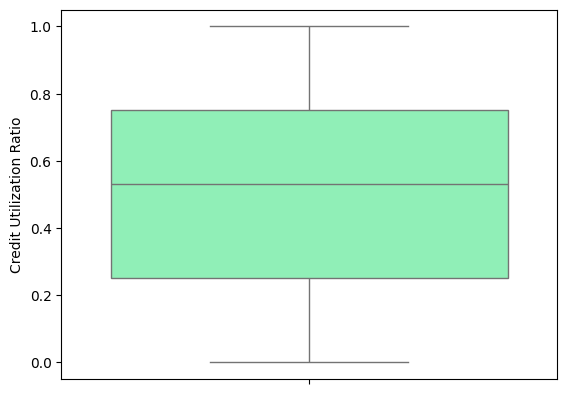

In [8]:
sns.boxplot(y='Credit Utilization Ratio', data=df, palette='rainbow')

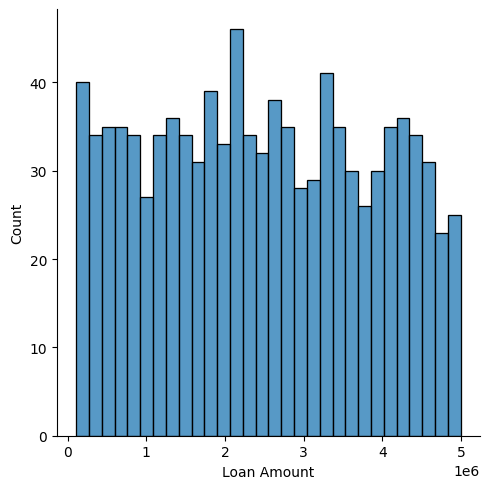

In [9]:
sns.displot(df['Loan Amount'], bins=30)

<Axes: >

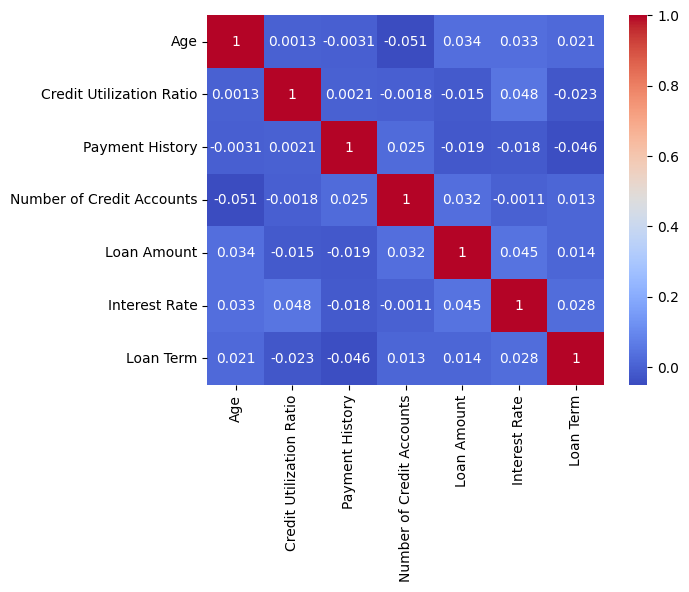

In [10]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)

### Now we are going to calculate the credit score per individual

In [11]:
# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

In [12]:
# Apply mapping to categorical features
df['Education Level'] = df['Education Level'].map(education_level_mapping)
df['Employment Status'] = df['Employment Status'].map(employment_status_mapping)

In [13]:
df.head(5)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [16]:
# Calculate credit score using the complete FICO formula
credit_scores = []

for index, row in df.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']
    
    # Apply the FICO formula to calculte the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)
    
df['Credit Score'] = credit_scores

In [17]:
df.head(5)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797


### Segmentation Based on Credit Scores

In [19]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)

In [23]:
X = df[['Credit Score']]

In [25]:
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [26]:
df['Segment'] = kmeans.labels_       
#returns an array of integers where each integer corresponds to the cluster label assigned to each data point

In [27]:
print(df['Segment'])

0      3
1      3
2      3
3      0
4      0
      ..
995    0
996    1
997    3
998    0
999    0
Name: Segment, Length: 1000, dtype: int32


In [28]:
# Convert the 'Segment' column to category data type
df['Segment'] = df['Segment'].astype('category')


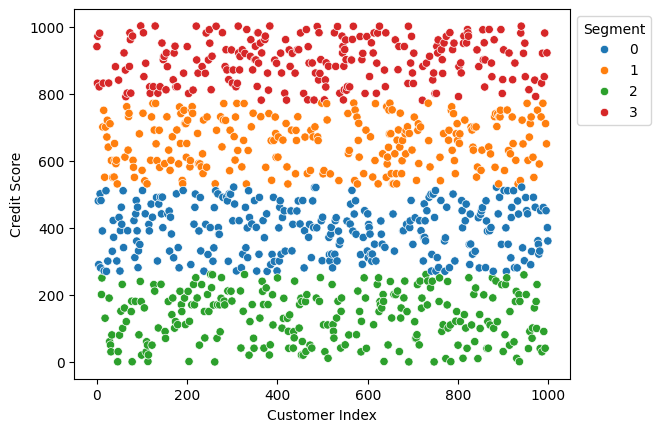

In [40]:
# Visualize the segments 
sns.scatterplot(data=df, x=df.index, y='Credit Score', hue='Segment', legend='full')
plt.xlabel('Customer Index')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1, 1)) 

In [42]:
# Now lets name the segments based on the above clusters
df['Segment'] = df['Segment'].map({2: 'Very Low', 0: 'Low', 1: 'Good', 3: 'Excellent'}) 

In [43]:
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score,Segment
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516,Excellent
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360,Excellent
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216,Excellent
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586,Low
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797,Low


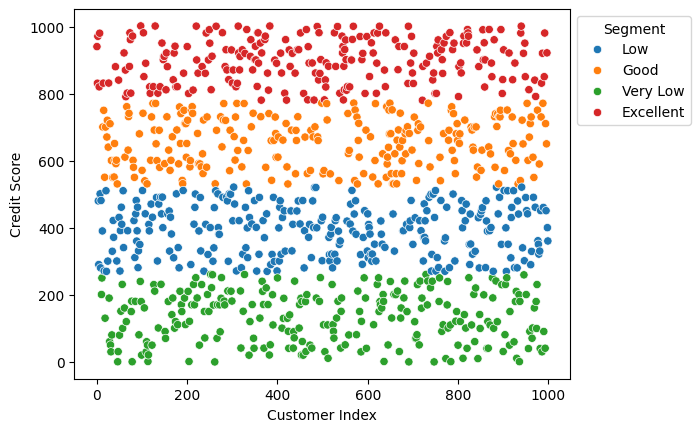

In [45]:
df['Segment'] = df['Segment'].astype('category')

sns.scatterplot(data=df, x=df.index, y='Credit Score', hue='Segment', legend='full')
plt.xlabel('Customer Index')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1, 1)) 

In [49]:
# Define the classification logic
def classify_credit_score(credit_score):
    if credit_score < 200:
        return 'Very Low'
    elif 200 <= credit_score < 500:
        return 'Low'
    elif 500 <= credit_score < 800:
        return 'Good'
    else:
        return 'Excellent'

# Simulate a new data point
new_point = {'Credit Score': 878}  # Replace with your new data
new_segment = classify_credit_score(new_point['Credit Score'])

print(f"New point with Credit Score {new_point['Credit Score']} is classified as: {new_segment}")


New point with Credit Score 878 is classified as: Excellent
